In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_filtered = pd.read_csv('9个月总数据.csv')

In [5]:
# 准备数据
df_filtered1 = df_filtered.drop(columns=["月份"])
X = df_filtered1.drop(columns=["最高报警等级"])  # 特征
y = df_filtered1["最高报警等级"]  # 目标变量

In [7]:
# 训练随机森林分类器
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# 获取特征重要性
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# 打印特征重要性
print("特征重要性:")
print(feature_importances)

特征重要性:
累计里程           0.549103
最高温度值          0.083371
最低温度值          0.080473
SOC            0.036131
驱动电机温度         0.034953
驱动电机控制器温度      0.032369
总电压            0.028990
电池单体电压最高值      0.027016
电池单体电压最低值      0.026573
绝缘电阻           0.021398
总电流            0.020270
电机控制器输入电压      0.017099
驱动电机转速         0.011632
车速             0.011580
驱动电机转矩         0.008077
电机控制器直流母线电流    0.007828
车辆状态           0.001406
充电状态           0.001240
DC-DC状态        0.000492
dtype: float64


C:\Users\86155\AppData\Local\Temp\ipykernel_20076\348729428.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis", hue=None)


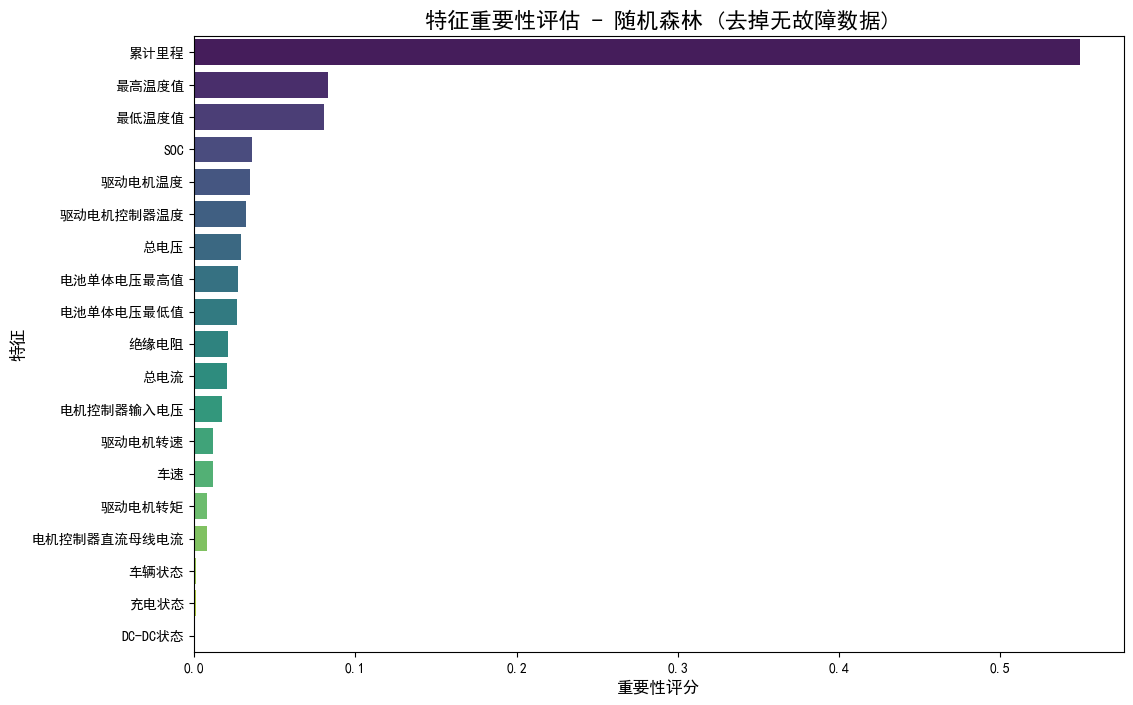

In [8]:
# 可视化特征重要性
from matplotlib import rcParams
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis", hue=None)
plt.title("特征重要性评估 - 随机森林 (去掉无故障数据)", fontsize=16)
plt.xlabel("重要性评分", fontsize=12)
plt.ylabel("特征", fontsize=12)
plt.show()

特征之间的交互作用

决策树图像已保存至：decision_tree.png


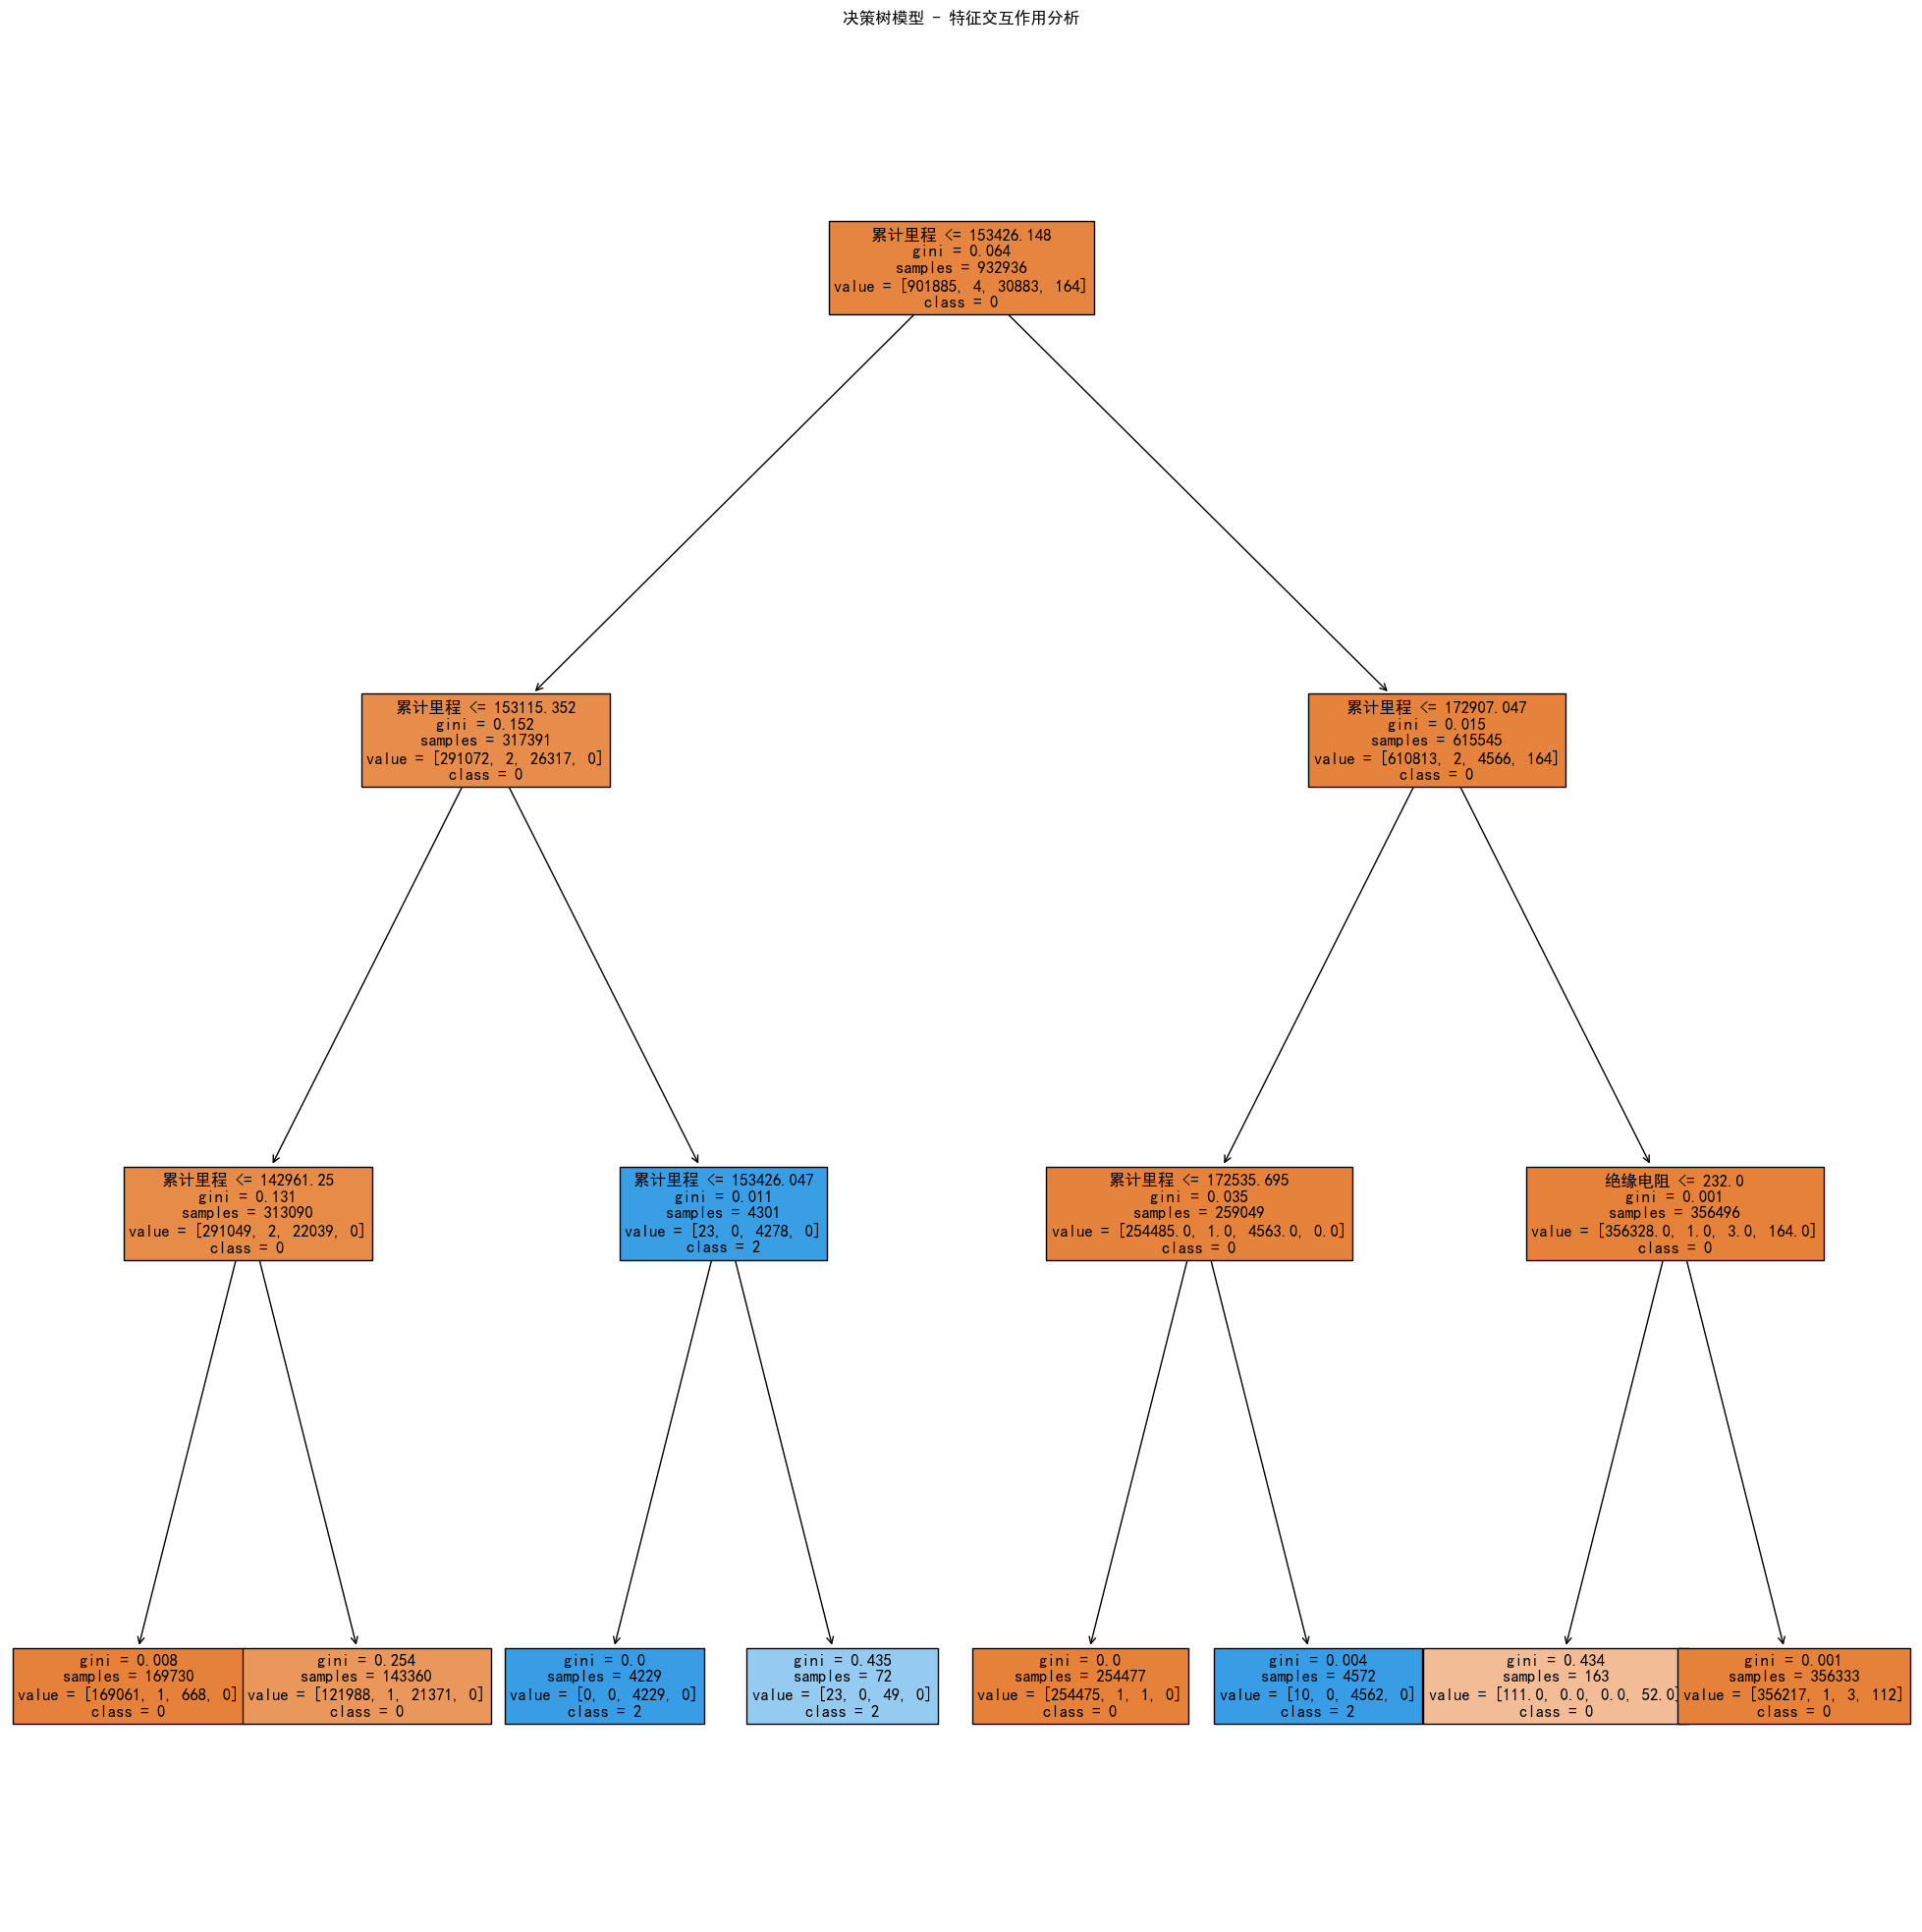

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 使用决策树进行特征交互作用分析
X = df_filtered1.drop(columns=["最高报警等级"])
y = df_filtered1["最高报警等级"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练决策树模型
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # 限制树的深度
dt_model.fit(X_train, y_train)

# 可视化决策树
from sklearn.tree import plot_tree
tree_image_path = "decision_tree.png"  # 保存的文件名
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题
plt.figure(figsize=(25, 25))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["0", "1", "2", "3"], fontsize=12)
plt.title('决策树模型 - 特征交互作用分析')
plt.savefig(tree_image_path, format='png')
print(f"决策树图像已保存至：{tree_image_path}")